In [76]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

random.seed('spearhead')

# Surpress SettingsWithCopyWarning Error
pd.options.mode.copy_on_write = True

In [77]:
data_table = pd.read_csv('Modified_Irrigation.csv')
# ship_table.head(2)

In [78]:
data_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   crop      200 non-null    object
 1   moisture  200 non-null    int64 
 2   temp      200 non-null    int64 
 3   pump      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [79]:
# Better Approach
# ship_table.dropna(inplace=True)
# ship_table.reset_index(drop=True, inplace=True)
adjusted_dataset = data_table.dropna()
adjusted_dataset = adjusted_dataset.reset_index(drop=True)

# adjusted_dataset.info()
# adjusted_dataset.columns
# adjusted_dataset.corr(method='pearson', numeric_only=True)

In [80]:
feature1 = 'moisture'
feature2 = 'temp'

k_mean_df = adjusted_dataset[[feature1, feature2]] 
# k_mean_df['n_centroid'] = np.nan

k_mean_df.tail()

,moisture,temp
195,941,13
196,902,45
197,894,42
198,1022,45
199,979,10


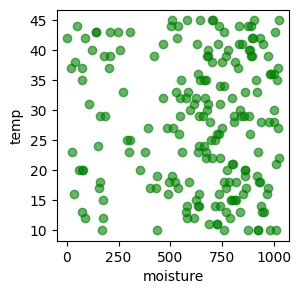

In [81]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(k_mean_df[feature1], k_mean_df[feature2], color='green', alpha=0.6)
ax.set_ylabel(feature2)
ax.set_xlabel(feature1)
plt.show()

In [82]:
# centroid = np.array([k_mean_df[feature1].mean(), k_mean_df[feature2].mean()])
# print(centroid)
# # k = 1
# fig, ax = plt.subplots(figsize=(3, 3))
# ax.scatter(k_mean_df[feature1], k_mean_df[feature2], color='green', alpha=0.6)
# ax.scatter(centroid[0], centroid[1], color='red', marker='x') 
# ax.set_xlabel(feature1)
# ax.set_ylabel(feature2)
# plt.show()

In [83]:
def randompoint(feature):
  min = k_mean_df[feature].min()
  max = k_mean_df[feature].max()
  return random.randint(min.astype(np.int64), max.astype(np.int64))

# number_centroids = 2
# centroids = np.array([[randompoint(feature1), randompoint(feature2)] for _ in range(number_centroids)])
# print(centroids)

In [84]:
# distances_centroids = np.array([[math.dist([k_mean_df.iloc[x][feature1], k_mean_df.iloc[x][feature2]], [centroid[0], centroid[1]]) for centroid in centroids] for x in range(k_mean_df.shape[0])])
# print(distances_centroids)

In [85]:
# # Get Nearest Centroid for each point
# index_centroids = np.array([[x.argmin(), x[x.argmin()]] for x in distances_centroids])
# # print(index_centroids)
# k_mean_df['nearest_centroids'] = index_centroids[:, 0]
# wcss = index_centroids[:, 1].sum()
# # print(wcss)

In [86]:
# # fig, ax = plt.subplots(figsize=(8, 8))
# fig, ax = plt.subplots()

# # Datasets
# ax.scatter(k_mean_df[feature1], k_mean_df[feature2], c=k_mean_df['nearest_centroids'], cmap='cool', alpha=0.7)

# # Centroids
# centroid_x = centroids[:, 0]
# centroid_y = centroids[:, 1]
# colors = ['black', 'green', 'blue']
# plt.scatter(centroid_x, centroid_y, c=range(len(centroids)), cmap='spring', marker='*', s=200)

# # plt.colorbar(ax)
# # Labels
# ax.set_xlabel(feature1)
# ax.set_ylabel(feature2)
# plt.show()

In [87]:
# NEW Centroids


# new_centroids = k_mean_df.groupby(by=['nearest_centroids']).mean()
# centroids = np.array([[new_centroids.iloc[i][feature1], new_centroids.iloc[i][feature2]] for i in range(len(new_centroids))])
# print(new_centroids)
# print(centroids)

In [88]:
# # termination criterion

# itr = 1
# while (True):
#   print(itr)

#   # Computer Distance for each centroid
#   distances_centroids = np.array([[math.dist([k_mean_df.iloc[x][feature1], k_mean_df.iloc[x][feature2]], [centroid[0], centroid[1]]) for centroid in centroids] for x in range(k_mean_df.shape[0])])

#   # NEW for WCSS
#   index_centroids = np.array([[x.argmin(), x[x.argmin()]] for x in distances_centroids])
#   k_mean_df['nearest_centroids'] = index_centroids[:, 0]

#   print(wcss)
#   # print(distances_centroids.sum()) # old termination criterion

#   # fig, ax = plt.subplots(figsize=(2,2))
#   fig, ax = plt.subplots()
#   # Datasets
#   ax.scatter(k_mean_df[feature1], k_mean_df[feature2], c=k_mean_df['nearest_centroids'], cmap='cool', alpha=0.7)
#   # Centroids
#   centroid_x = centroids[:, 0]
#   centroid_y = centroids[:, 1]
#   plt.scatter(centroid_x, centroid_y, c=range(len(centroids)), cmap='spring', marker='*', s=200)
#   # labels
#   ax.set_xlabel(feature1)
#   ax.set_ylabel(feature2)
#   plt.show()

#   # NEW Centroids 
#   new_centroids = k_mean_df.groupby(by=['nearest_centroids']).mean()
#   centroids = np.array([[new_centroids.iloc[i][feature1], new_centroids.iloc[i][feature2]] for i in range(len(new_centroids))])

#   itr+=1
  
#   # wcss termination criterion  
#   if (wcss == index_centroids[:, 1].sum()):
#     print(index_centroids[:, 1].sum())
#     break
#   wcss = index_centroids[:, 1].sum()

In [89]:
# print(k_mean_df.groupby(by=['nearest_centroids']).count())
# print(adjusted_dataset.groupby(by=['pump']).count())

1 number of centroids
iteration: 1
78743.95234759117


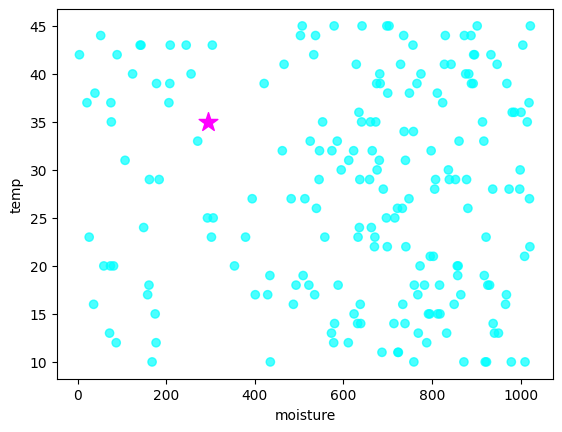

                   moisture  temp
nearest_centroids                
0.0                     200   200
iteration: 2
45183.732868777064


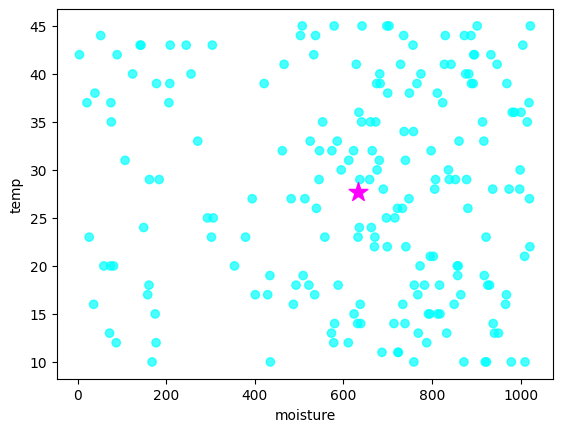

                   moisture  temp
nearest_centroids                
0.0                     200   200
iteration: 3
45183.732868777064


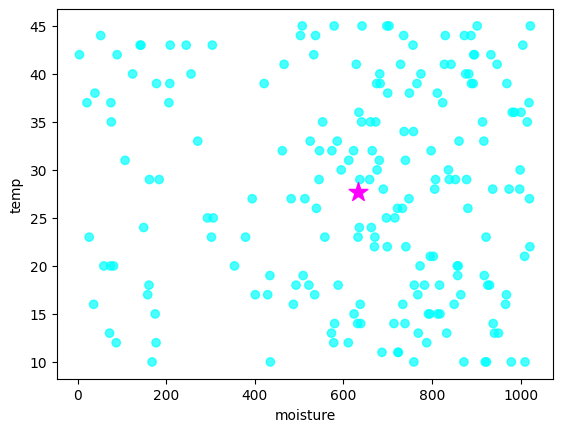

45183.732868777064
                   moisture  temp
nearest_centroids                
0.0                     200   200
      crop  moisture  temp
pump                      
0       50        50    50
1      150       150   150
2 number of centroids
iteration: 1
27579.374967217325


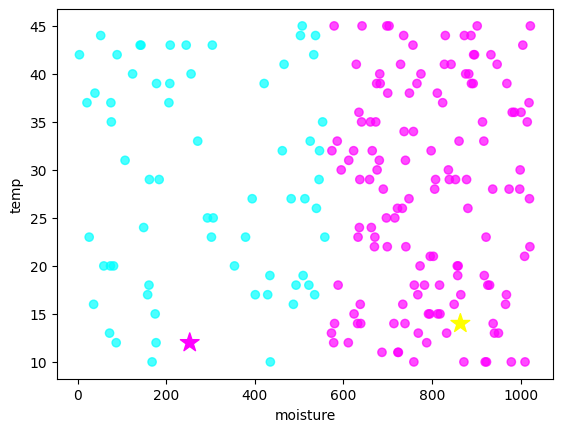

                   moisture  temp
nearest_centroids                
0.0                      64    64
1.0                     136   136
iteration: 2
25580.06291485983


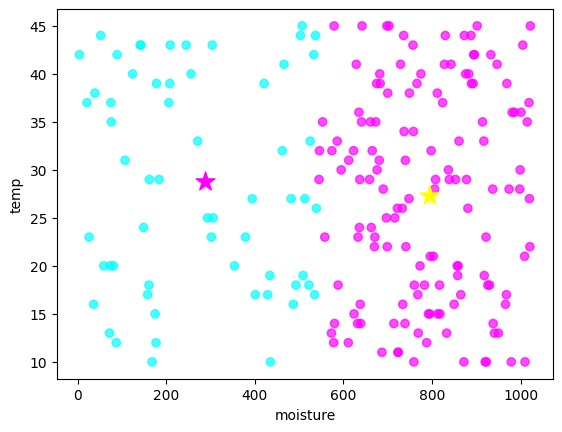

                   moisture  temp
nearest_centroids                
0.0                      60    60
1.0                     140   140
iteration: 3
25406.94097753718


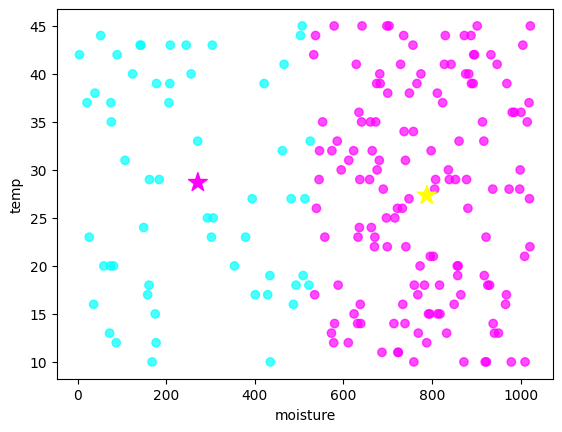

                   moisture  temp
nearest_centroids                
0.0                      56    56
1.0                     144   144
iteration: 4
25217.40499686101


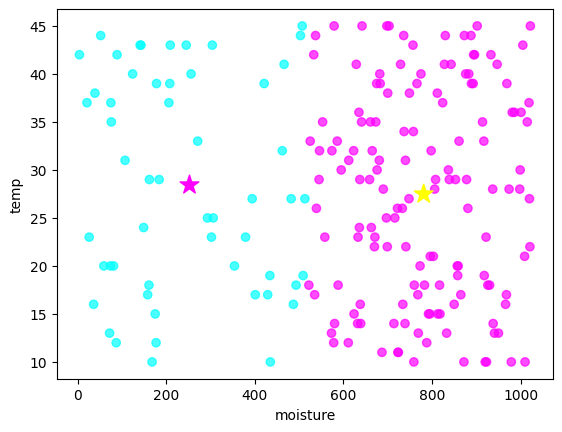

                   moisture  temp
nearest_centroids                
0.0                      54    54
1.0                     146   146
iteration: 5
25125.14456951765


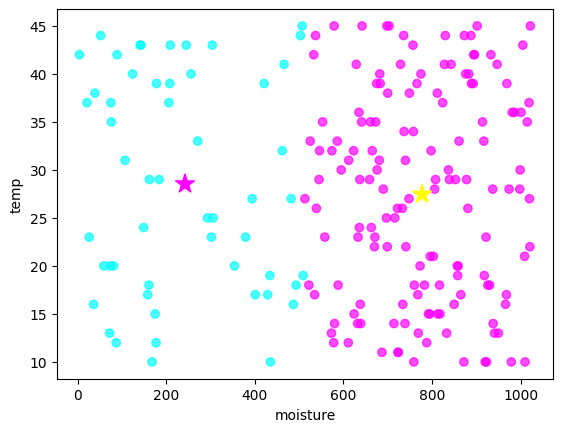

                   moisture  temp
nearest_centroids                
0.0                      53    53
1.0                     147   147
iteration: 6
25075.256433183822


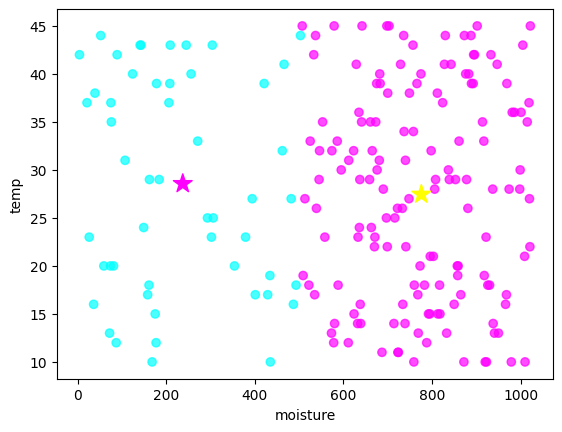

                   moisture  temp
nearest_centroids                
0.0                      51    51
1.0                     149   149
iteration: 7
24960.86742818057


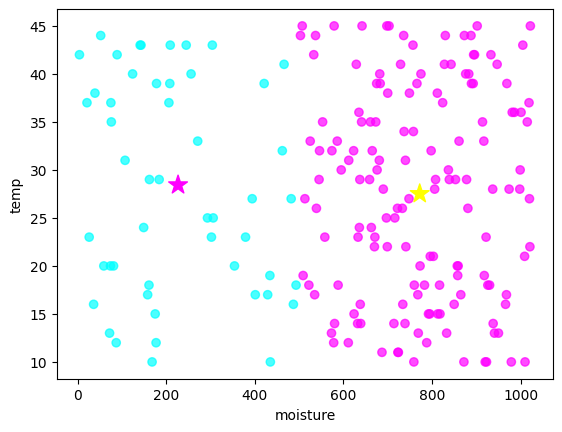

                   moisture  temp
nearest_centroids                
0.0                      50    50
1.0                     150   150
iteration: 8
24904.56828473103


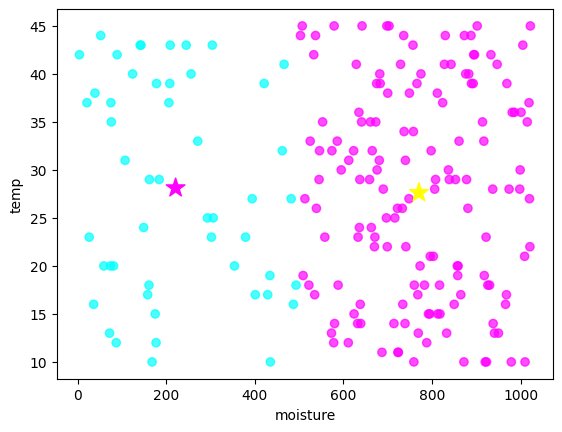

                   moisture  temp
nearest_centroids                
0.0                      50    50
1.0                     150   150
iteration: 9
24904.56828473103


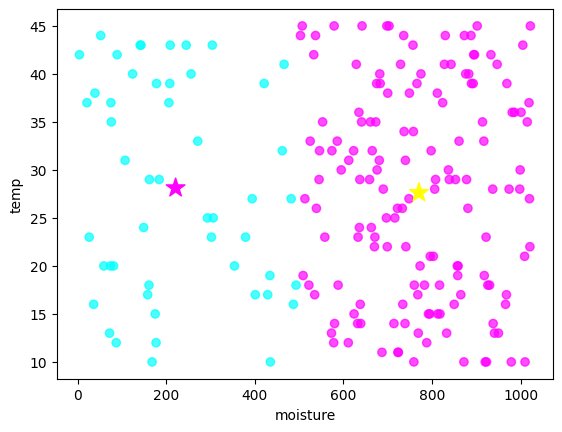

24904.56828473103
                   moisture  temp
nearest_centroids                
0.0                      50    50
1.0                     150   150
      crop  moisture  temp
pump                      
0       50        50    50
1      150       150   150
3 number of centroids
iteration: 1
28596.17649924925


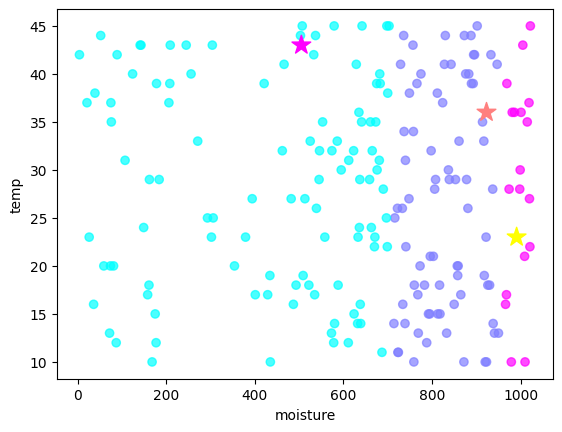

                   moisture  temp
nearest_centroids                
0.0                     105   105
1.0                      77    77
2.0                      18    18
iteration: 2
23810.388676977214


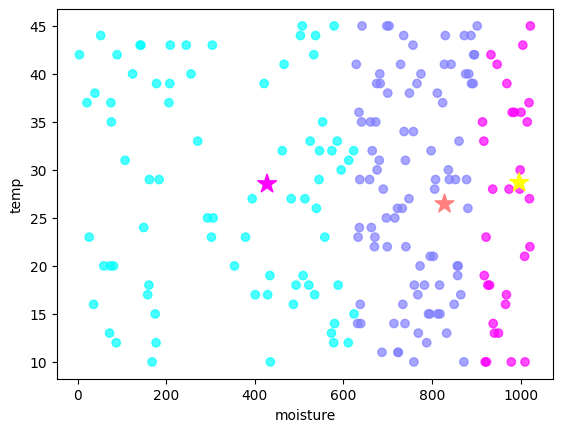

                   moisture  temp
nearest_centroids                
0.0                      76    76
1.0                      92    92
2.0                      32    32
iteration: 3
20303.930699394812


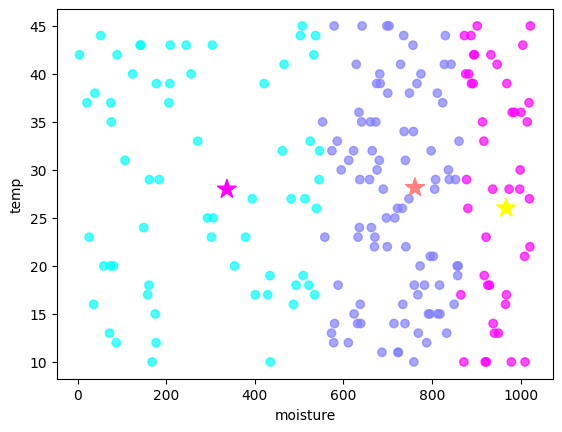

                   moisture  temp
nearest_centroids                
0.0                      62    62
1.0                      93    93
2.0                      45    45
iteration: 4
18004.805342437197


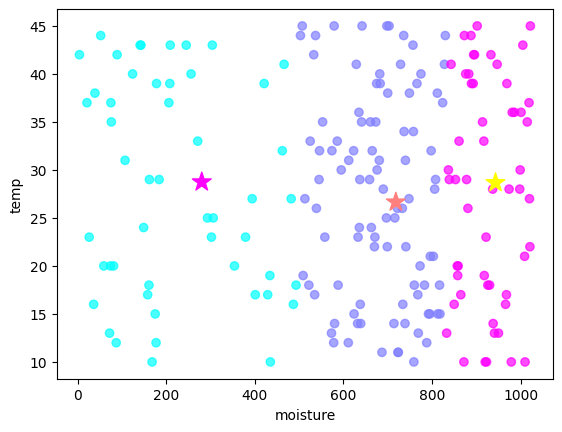

                   moisture  temp
nearest_centroids                
0.0                      50    50
1.0                      95    95
2.0                      55    55
iteration: 5
16264.979488448169


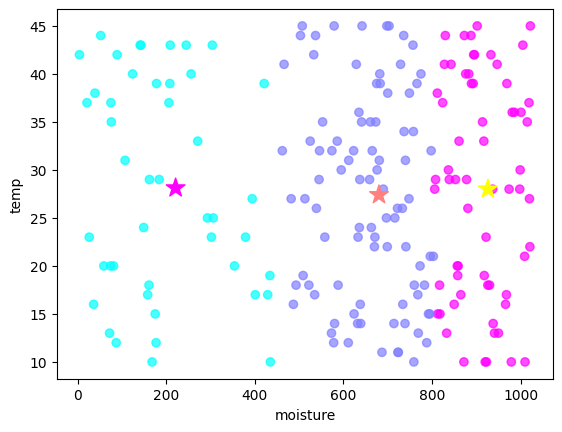

                   moisture  temp
nearest_centroids                
0.0                      45    45
1.0                      91    91
2.0                      64    64
iteration: 6
15621.038343655917


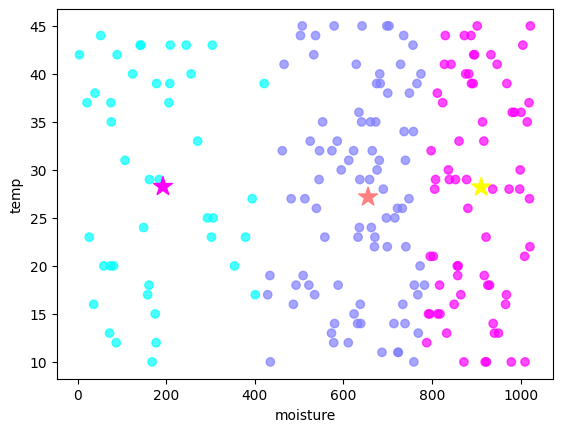

                   moisture  temp
nearest_centroids                
0.0                      42    42
1.0                      88    88
2.0                      70    70
iteration: 7
15394.055482584728


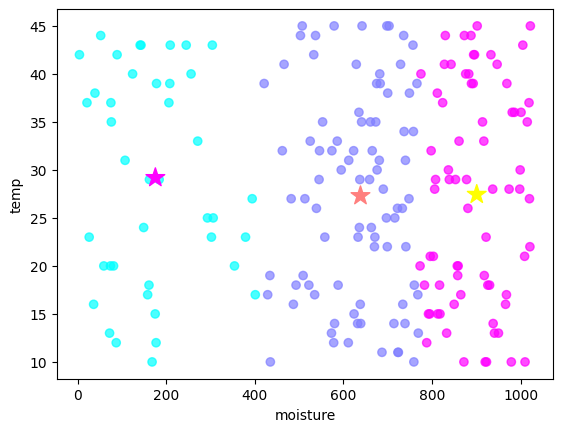

                   moisture  temp
nearest_centroids                
0.0                      41    41
1.0                      86    86
2.0                      73    73
iteration: 8
15366.154782859961


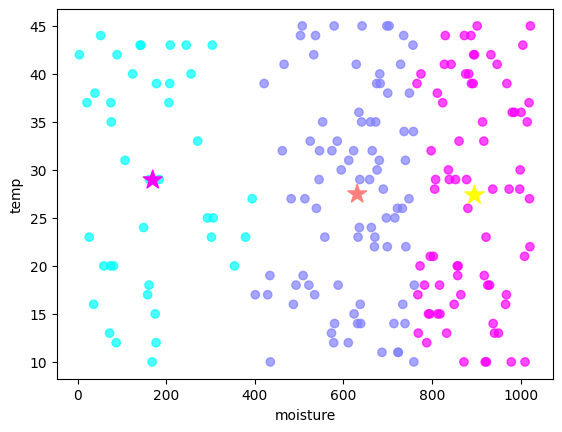

                   moisture  temp
nearest_centroids                
0.0                      40    40
1.0                      84    84
2.0                      76    76
iteration: 9
15375.922983489007


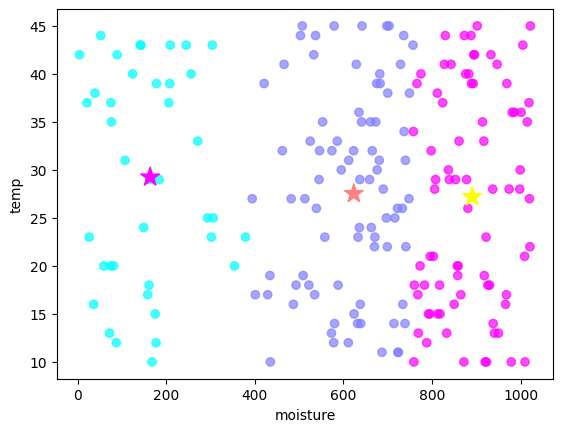

                   moisture  temp
nearest_centroids                
0.0                      39    39
1.0                      82    82
2.0                      79    79
iteration: 10
15398.876314916723


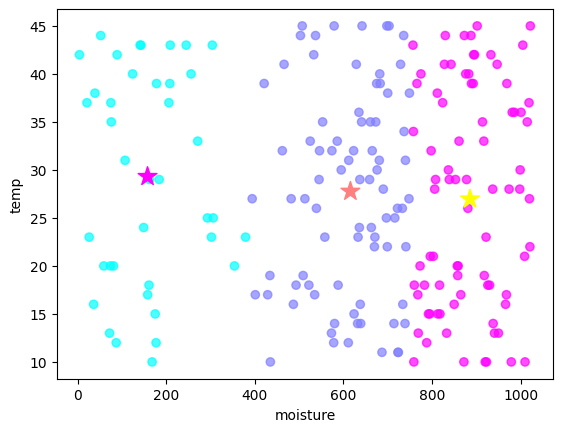

                   moisture  temp
nearest_centroids                
0.0                      39    39
1.0                      81    81
2.0                      80    80
iteration: 11
15408.84093512757


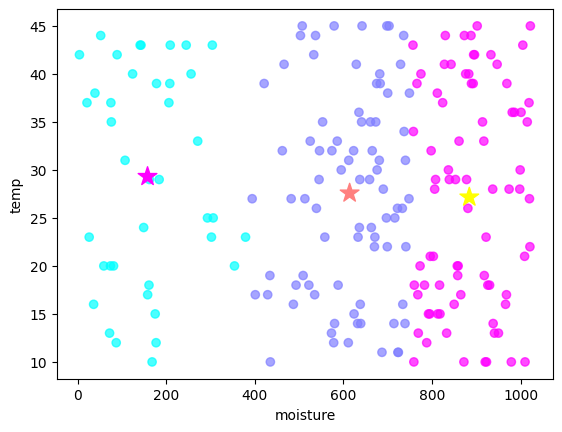

                   moisture  temp
nearest_centroids                
0.0                      39    39
1.0                      81    81
2.0                      80    80
iteration: 12
15408.84093512757


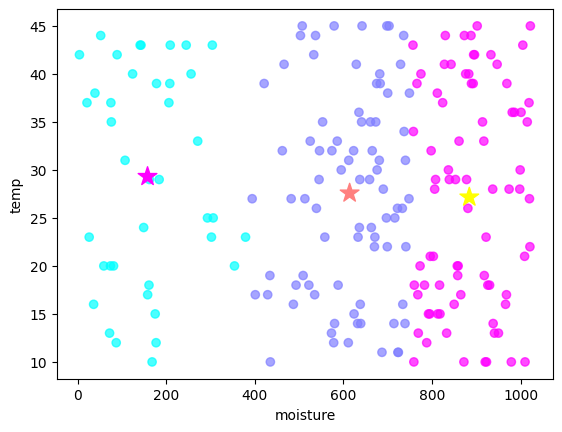

15408.84093512757
                   moisture  temp
nearest_centroids                
0.0                      39    39
1.0                      81    81
2.0                      80    80
      crop  moisture  temp
pump                      
0       50        50    50
1      150       150   150
4 number of centroids
iteration: 1
24745.86538848438


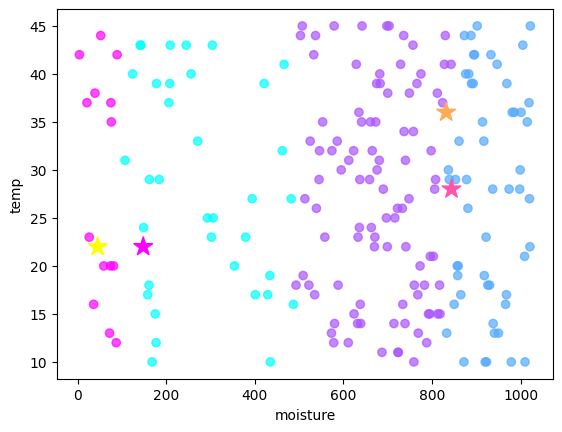

                   moisture  temp
nearest_centroids                
0.0                      35    35
1.0                      54    54
2.0                      97    97
3.0                      14    14
iteration: 2
14060.046179715051


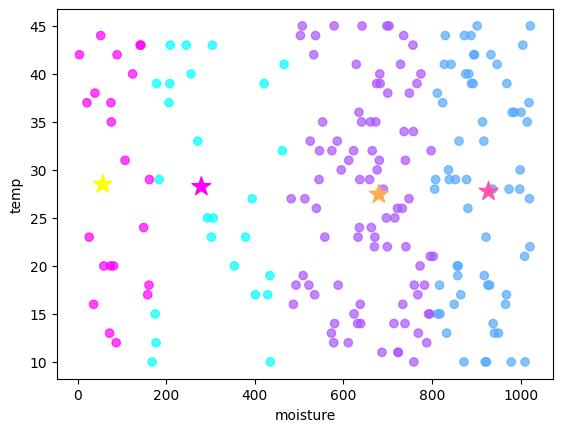

                   moisture  temp
nearest_centroids                
0.0                      25    25
1.0                      64    64
2.0                      89    89
3.0                      22    22
iteration: 3
13451.989579520792


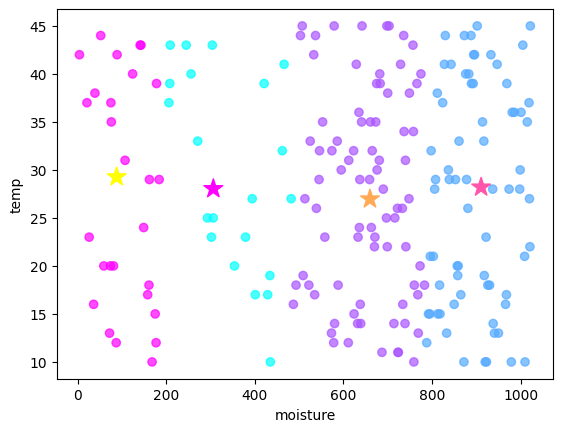

                   moisture  temp
nearest_centroids                
0.0                      21    21
1.0                      70    70
2.0                      82    82
3.0                      27    27
iteration: 4
13234.08423220874


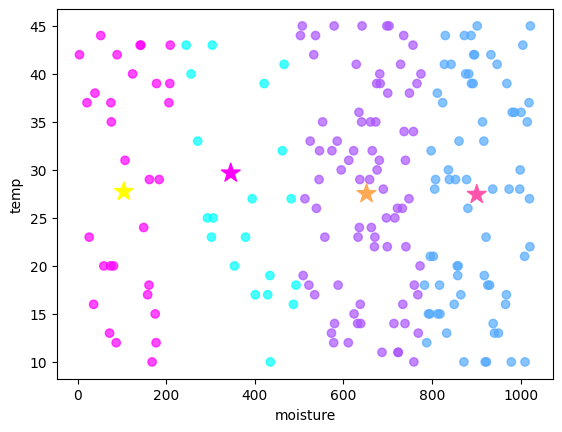

                   moisture  temp
nearest_centroids                
0.0                      20    20
1.0                      71    71
2.0                      79    79
3.0                      30    30
iteration: 5
12966.151934522135


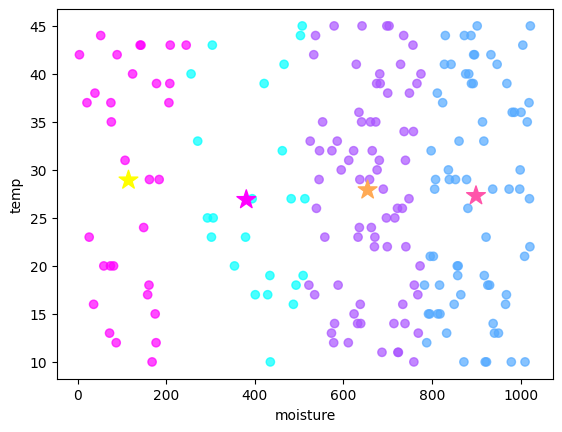

                   moisture  temp
nearest_centroids                
0.0                      23    23
1.0                      71    71
2.0                      75    75
3.0                      31    31
iteration: 6
12682.161403221144


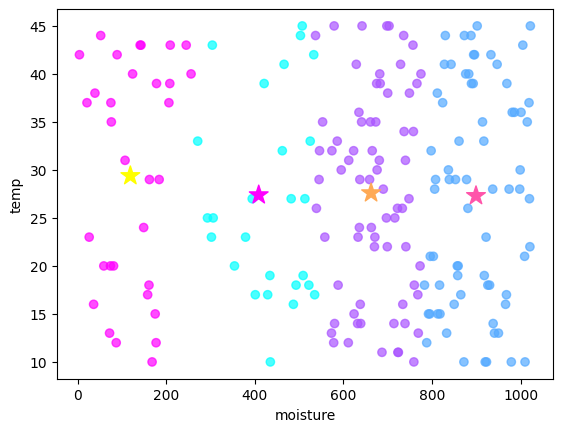

                   moisture  temp
nearest_centroids                
0.0                      26    26
1.0                      71    71
2.0                      71    71
3.0                      32    32
iteration: 7
12389.228371647552


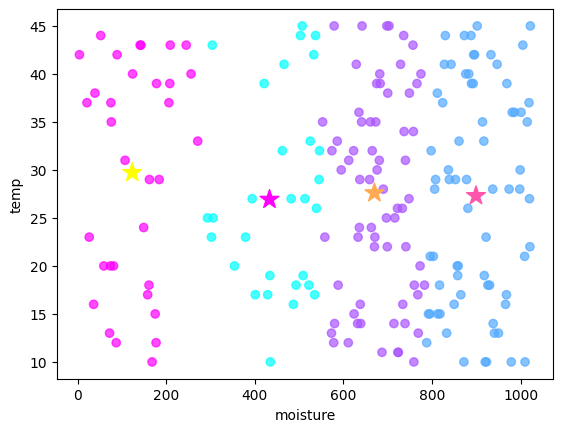

                   moisture  temp
nearest_centroids                
0.0                      29    29
1.0                      70    70
2.0                      68    68
3.0                      33    33
iteration: 8
12176.462789870824


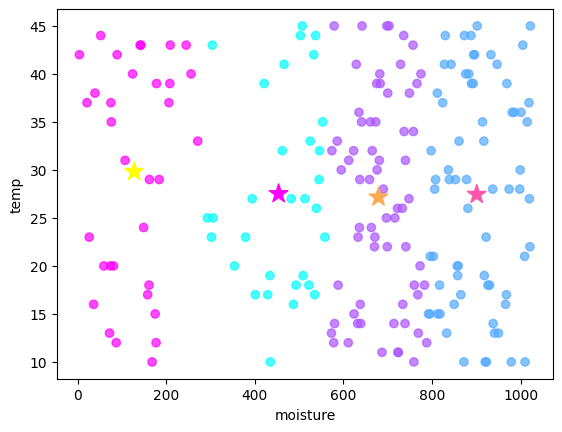

                   moisture  temp
nearest_centroids                
0.0                      31    31
1.0                      69    69
2.0                      67    67
3.0                      33    33
iteration: 9
12125.609666980114


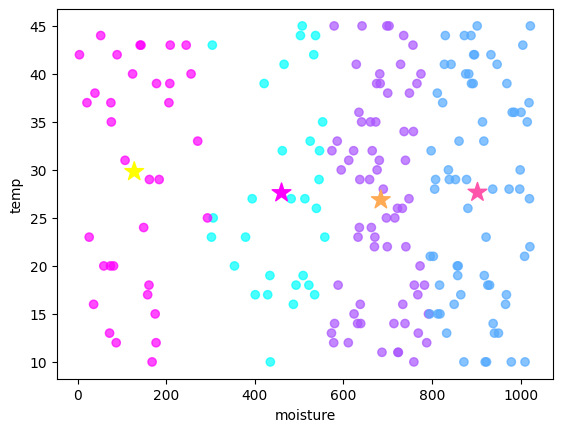

                   moisture  temp
nearest_centroids                
0.0                      30    30
1.0                      68    68
2.0                      68    68
3.0                      34    34
iteration: 10
12077.702512264012


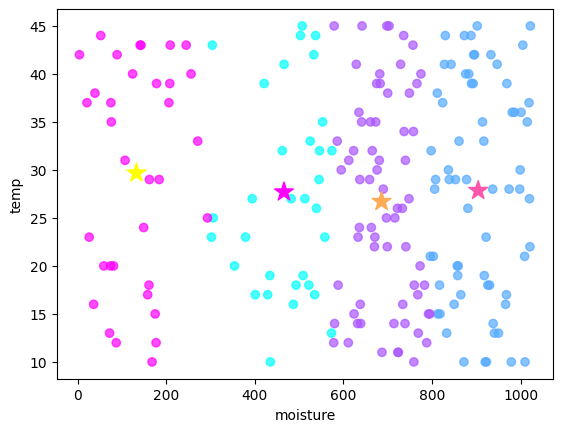

                   moisture  temp
nearest_centroids                
0.0                      32    32
1.0                      67    67
2.0                      67    67
3.0                      34    34
iteration: 11
12005.007135818498


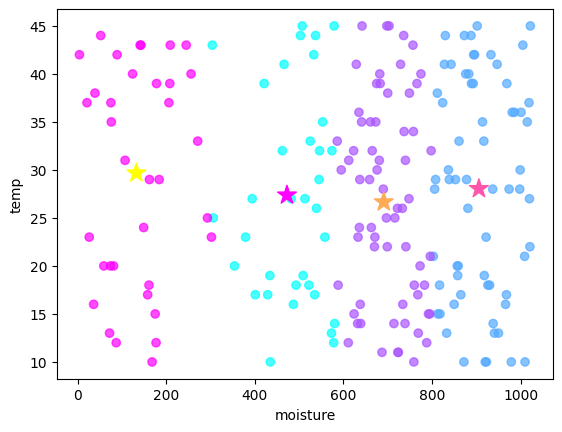

                   moisture  temp
nearest_centroids                
0.0                      34    34
1.0                      65    65
2.0                      66    66
3.0                      35    35
iteration: 12
11805.870834376155


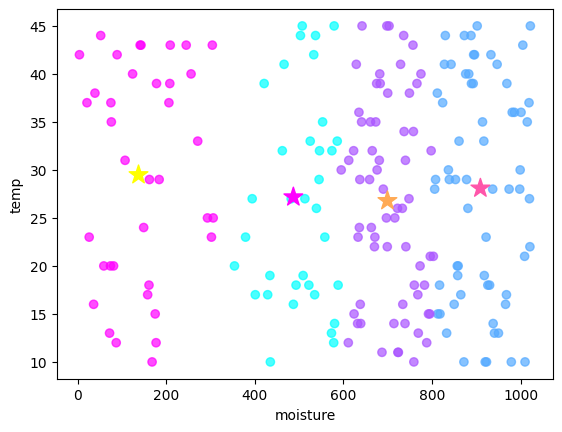

                   moisture  temp
nearest_centroids                
0.0                      34    34
1.0                      64    64
2.0                      65    65
3.0                      37    37
iteration: 13
11635.66579861299


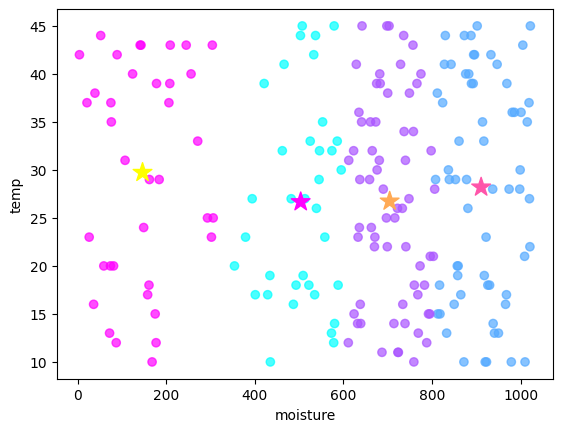

                   moisture  temp
nearest_centroids                
0.0                      35    35
1.0                      63    63
2.0                      65    65
3.0                      37    37
iteration: 14
11615.300800306582


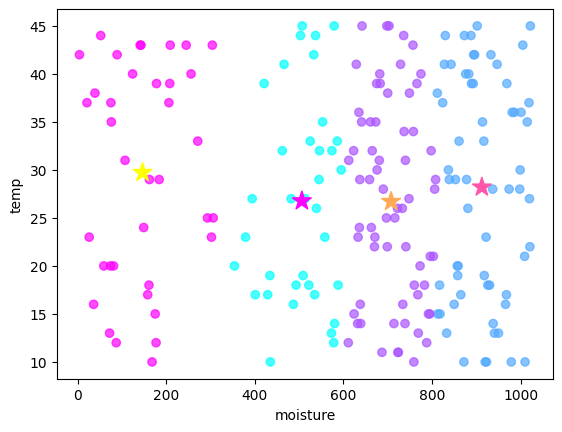

                   moisture  temp
nearest_centroids                
0.0                      35    35
1.0                      62    62
2.0                      66    66
3.0                      37    37
iteration: 15
11615.851829153104


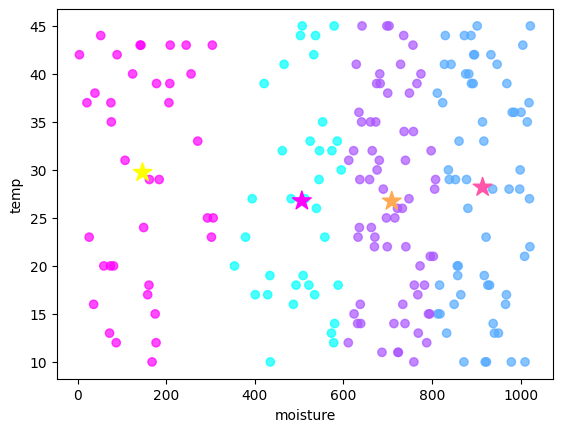

                   moisture  temp
nearest_centroids                
0.0                      35    35
1.0                      62    62
2.0                      66    66
3.0                      37    37
iteration: 16
11615.851829153104


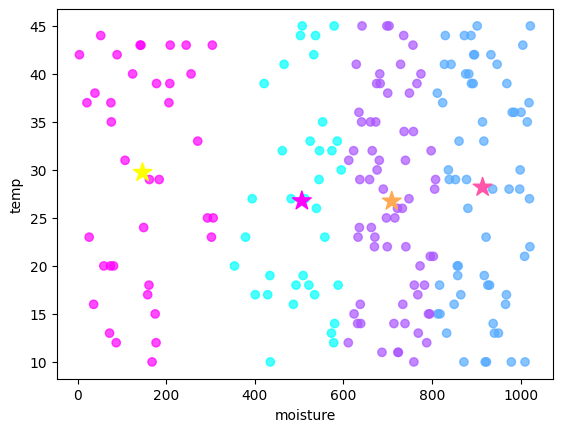

11615.851829153104
                   moisture  temp
nearest_centroids                
0.0                      35    35
1.0                      62    62
2.0                      66    66
3.0                      37    37
      crop  moisture  temp
pump                      
0       50        50    50
1      150       150   150
5 number of centroids
iteration: 1
18869.136652201963


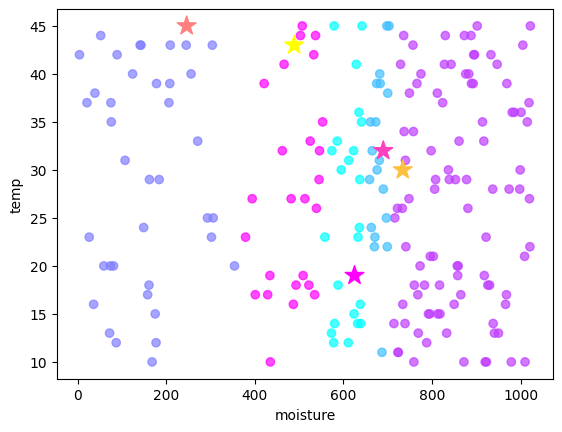

                   moisture  temp
nearest_centroids                
0.0                      23    23
1.0                      19    19
2.0                      38    38
3.0                      95    95
4.0                      25    25
iteration: 2
11308.218882378793


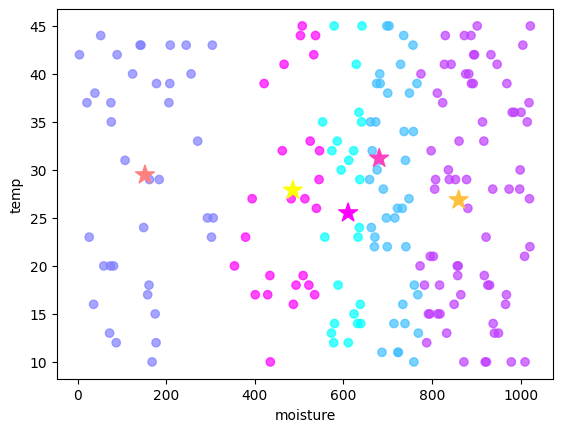

                   moisture  temp
nearest_centroids                
0.0                      24    24
1.0                      41    41
2.0                      37    37
3.0                      73    73
4.0                      25    25
iteration: 3
10470.841106614167


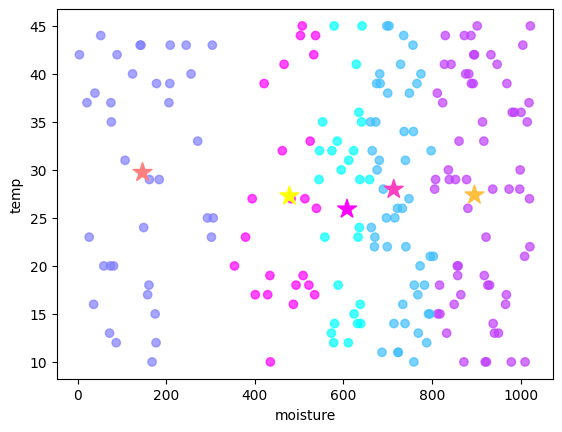

                   moisture  temp
nearest_centroids                
0.0                      27    27
1.0                      49    49
2.0                      37    37
3.0                      64    64
4.0                      23    23
iteration: 4
10253.72992447317


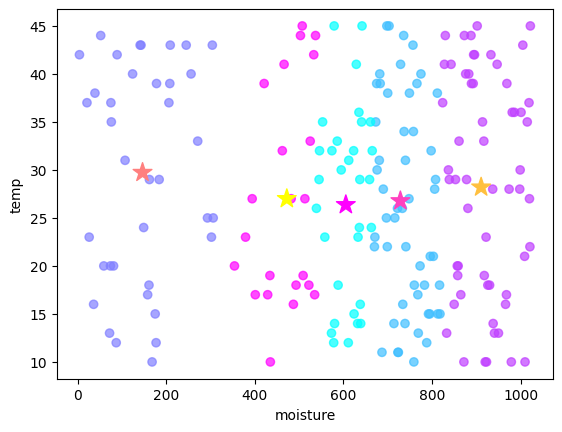

                   moisture  temp
nearest_centroids                
0.0                      31    31
1.0                      52    52
2.0                      37    37
3.0                      58    58
4.0                      22    22
iteration: 5
10117.239678935493


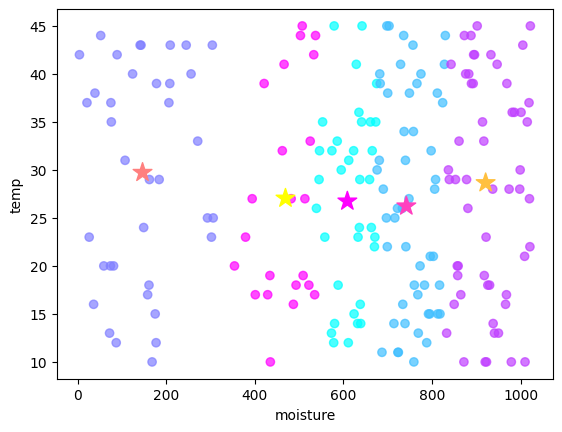

                   moisture  temp
nearest_centroids                
0.0                      35    35
1.0                      51    51
2.0                      37    37
3.0                      55    55
4.0                      22    22
iteration: 6
10005.101281873536


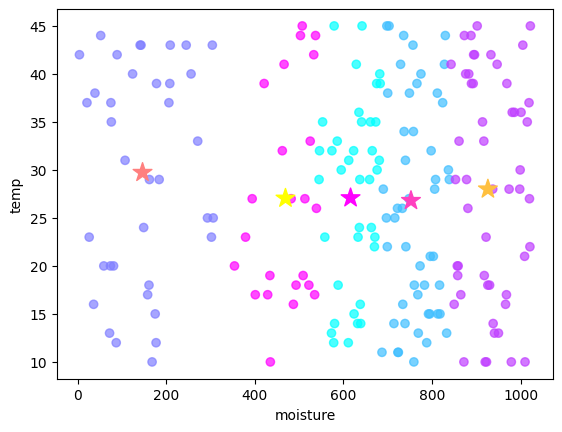

                   moisture  temp
nearest_centroids                
0.0                      38    38
1.0                      50    50
2.0                      37    37
3.0                      52    52
4.0                      23    23
iteration: 7
9874.476677509883


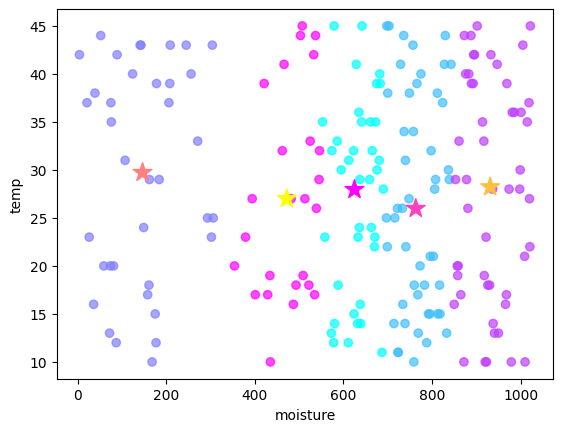

                   moisture  temp
nearest_centroids                
0.0                      38    38
1.0                      49    49
2.0                      37    37
3.0                      51    51
4.0                      25    25
iteration: 8
9776.760759748153


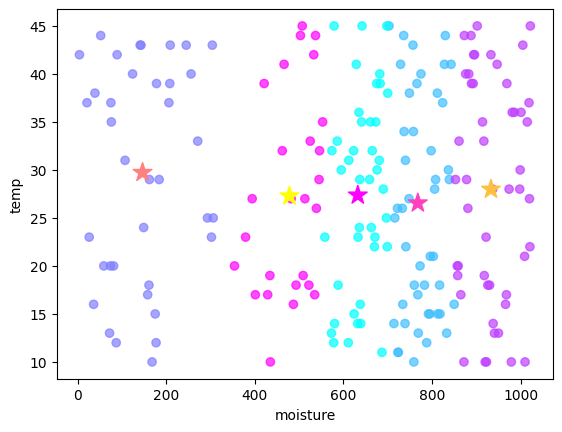

                   moisture  temp
nearest_centroids                
0.0                      41    41
1.0                      46    46
2.0                      37    37
3.0                      50    50
4.0                      26    26
iteration: 9
9695.363192420546


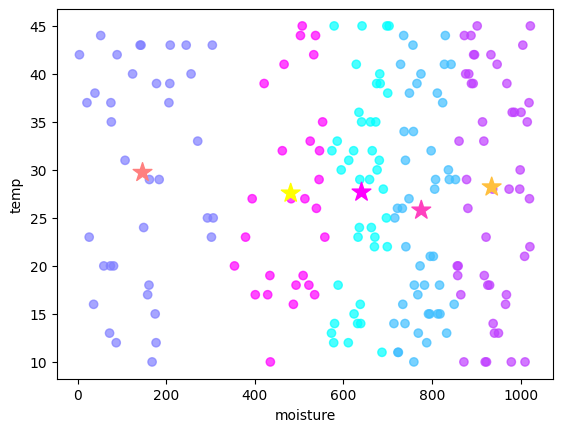

                   moisture  temp
nearest_centroids                
0.0                      41    41
1.0                      46    46
2.0                      37    37
3.0                      49    49
4.0                      27    27
iteration: 10
9678.969332573906


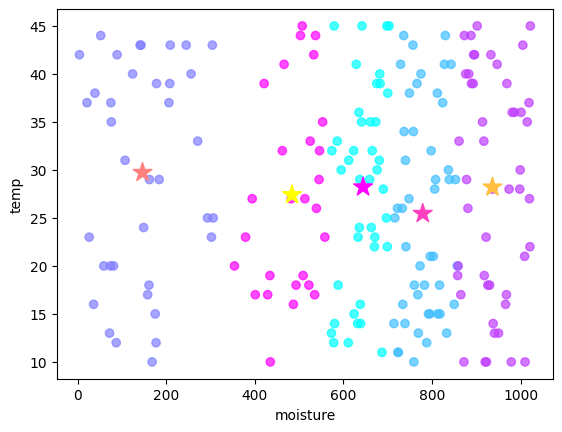

                   moisture  temp
nearest_centroids                
0.0                      41    41
1.0                      47    47
2.0                      37    37
3.0                      48    48
4.0                      27    27
iteration: 11
9681.396609397169


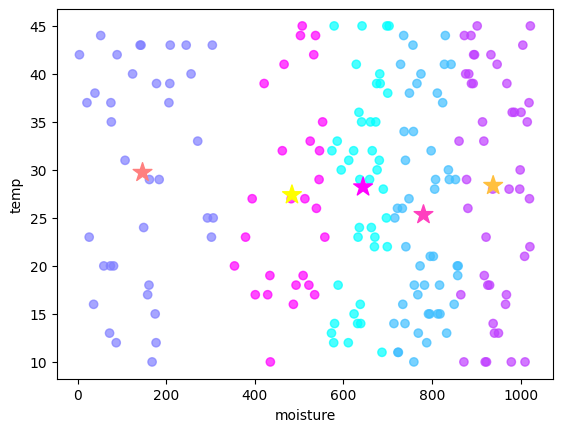

                   moisture  temp
nearest_centroids                
0.0                      41    41
1.0                      49    49
2.0                      37    37
3.0                      46    46
4.0                      27    27
iteration: 12
9688.37611612084


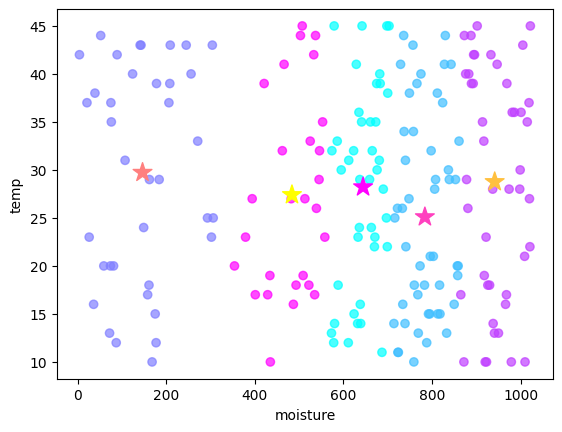

                   moisture  temp
nearest_centroids                
0.0                      41    41
1.0                      50    50
2.0                      37    37
3.0                      45    45
4.0                      27    27
iteration: 13
9692.646861141639


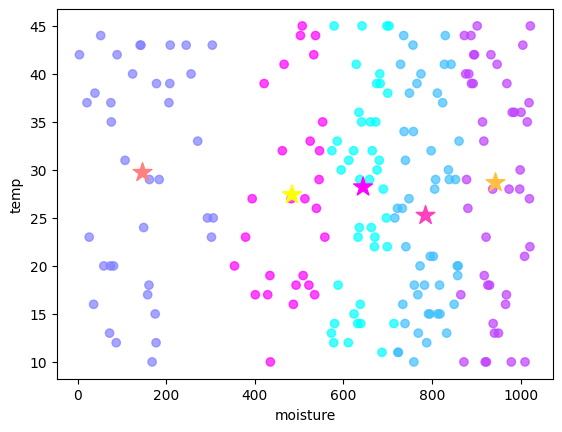

                   moisture  temp
nearest_centroids                
0.0                      42    42
1.0                      49    49
2.0                      37    37
3.0                      45    45
4.0                      27    27
iteration: 14
9689.108436172784


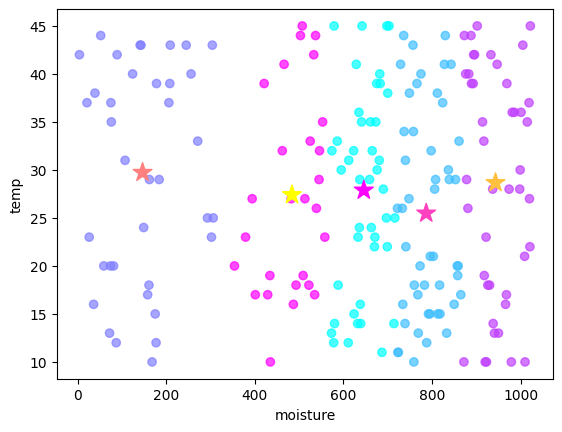

                   moisture  temp
nearest_centroids                
0.0                      43    43
1.0                      49    49
2.0                      37    37
3.0                      44    44
4.0                      27    27
iteration: 15
9687.53743376915


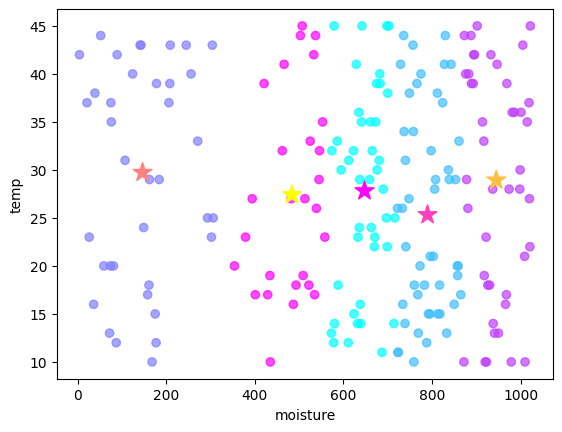

                   moisture  temp
nearest_centroids                
0.0                      43    43
1.0                      49    49
2.0                      37    37
3.0                      44    44
4.0                      27    27
iteration: 16
9687.53743376915


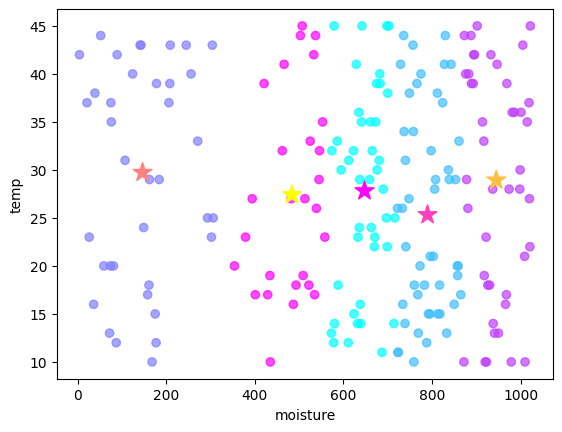

9687.53743376915
                   moisture  temp
nearest_centroids                
0.0                      43    43
1.0                      49    49
2.0                      37    37
3.0                      44    44
4.0                      27    27
      crop  moisture  temp
pump                      
0       50        50    50
1      150       150   150


In [ ]:
# One for loop

for k in range(1,6):
  print(k, 'number of centroids')
  number_centroids = k
  centroids = np.array([[randompoint(feature1), randompoint(feature2)] for _ in range(number_centroids)])

  # fig, ax, axs = plt.subplots(1, 10, figsize=(2,2))

  wcss = 0
  itr = 1
  while (True):
    print('iteration:', itr)

    # Computer Distance for each centroid
    distances_centroids = np.array([[math.dist([k_mean_df.iloc[x][feature1], k_mean_df.iloc[x][feature2]], [centroid[0], centroid[1]]) for centroid in centroids] for x in range(k_mean_df.shape[0])])

    # NEW for WCSS
    index_centroids = np.array([[x.argmin(), x[x.argmin()]] for x in distances_centroids])
    k_mean_df['nearest_centroids'] = index_centroids[:, 0]

    print(index_centroids[:, 1].sum())

    # Visualization
    # fig, ax = plt.subplots(figsize=(2,2))
    fig, ax = plt.subplots()
    # Datasets
    ax.scatter(k_mean_df[feature1], k_mean_df[feature2], c=k_mean_df['nearest_centroids'], cmap='cool', alpha=0.7)
    # Centroids
    centroid_x = centroids[:, 0]
    centroid_y = centroids[:, 1]
    plt.scatter(centroid_x, centroid_y, c=range(len(centroids)), cmap='spring', marker='*', s=200)
    # labels
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    plt.show()

    # NEW Centroids 
    new_centroids = k_mean_df.groupby(by=['nearest_centroids']).mean()
    centroids = np.array([[new_centroids.iloc[i][feature1], new_centroids.iloc[i][feature2]] for i in range(len(new_centroids))])

    itr+=1

    # wcss termination criterion  
    if (wcss == index_centroids[:, 1].sum()):
      print(index_centroids[:, 1].sum())
      break
    wcss = index_centroids[:, 1].sum()

    print(k_mean_df.groupby(by=['nearest_centroids']).count())

  print(k_mean_df.groupby(by=['nearest_centroids']).count())
  print(adjusted_dataset.groupby(by=['pump']).count())